In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column', None)

In [2]:
# Since the file size is too big i.e. 307512 rows, taking sample rows randomly for analysis 

import random

x = 'application_data.csv'
num_lines = sum(1 for i in open(x))
size = int(num_lines//1.2)

random.seed(100)
skip_id = random.sample(range(1, num_lines), (num_lines-size))

df = pd.read_csv(x, skiprows=skip_id )
df = pd.read_csv(x)
df.shape
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Identify percentage missing values in each column
percent_missing = df.isnull().sum().sort_values(ascending=False)*100 / len(df)
percent_missing

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
                                 ...    
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
SK_ID_CURR                      0.000000
Length: 122, dtype: float64

#### Removing columns having missing value percentage more than 47% because those column are not significant in analysis

In [4]:
df.drop(["COMMONAREA_MEDI", "COMMONAREA_AVG", "COMMONAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_AVG", "FONDKAPREMONT_MODE","LIVINGAPARTMENTS_MEDI","LIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_AVG","FLOORSMIN_MEDI","FLOORSMIN_MODE","FLOORSMIN_AVG","YEARS_BUILD_MEDI","YEARS_BUILD_AVG","YEARS_BUILD_MODE","OWN_CAR_AGE","LANDAREA_MODE","LANDAREA_AVG","LANDAREA_MEDI","BASEMENTAREA_MEDI","BASEMENTAREA_AVG","BASEMENTAREA_MODE","EXT_SOURCE_1","NONLIVINGAREA_MEDI","NONLIVINGAREA_AVG","NONLIVINGAREA_MODE","ELEVATORS_MODE","ELEVATORS_AVG","ELEVATORS_MEDI","WALLSMATERIAL_MODE","APARTMENTS_MODE","APARTMENTS_AVG","APARTMENTS_MEDI","ENTRANCES_MEDI","ENTRANCES_MODE","ENTRANCES_AVG","LIVINGAREA_MEDI","LIVINGAREA_MODE","LIVINGAREA_AVG","HOUSETYPE_MODE","FLOORSMAX_MODE","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MODE","TOTALAREA_MODE","EMERGENCYSTATE_MODE"], axis = 1, inplace = True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0000,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0039,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Identify missing value count in each columns having missing values less than 47% 

obj = df.isnull().sum().sort_values(ascending=False)
for key,value in obj.iteritems():
    print(key,",",value)

NONLIVINGAPARTMENTS_MEDI , 213514
OCCUPATION_TYPE , 96391
EXT_SOURCE_3 , 60965
AMT_REQ_CREDIT_BUREAU_YEAR , 41519
AMT_REQ_CREDIT_BUREAU_MON , 41519
AMT_REQ_CREDIT_BUREAU_WEEK , 41519
AMT_REQ_CREDIT_BUREAU_DAY , 41519
AMT_REQ_CREDIT_BUREAU_HOUR , 41519
AMT_REQ_CREDIT_BUREAU_QRT , 41519
NAME_TYPE_SUITE , 1292
DEF_60_CNT_SOCIAL_CIRCLE , 1021
OBS_30_CNT_SOCIAL_CIRCLE , 1021
DEF_30_CNT_SOCIAL_CIRCLE , 1021
OBS_60_CNT_SOCIAL_CIRCLE , 1021
EXT_SOURCE_2 , 660
AMT_GOODS_PRICE , 278
AMT_ANNUITY , 12
CNT_FAM_MEMBERS , 2
DAYS_LAST_PHONE_CHANGE , 1
NAME_EDUCATION_TYPE , 0
FLAG_OWN_REALTY , 0
TARGET , 0
FLAG_EMAIL , 0
FLAG_PHONE , 0
FLAG_CONT_MOBILE , 0
NAME_CONTRACT_TYPE , 0
FLAG_WORK_PHONE , 0
FLAG_EMP_PHONE , 0
FLAG_MOBIL , 0
CODE_GENDER , 0
FLAG_OWN_CAR , 0
CNT_CHILDREN , 0
NAME_FAMILY_STATUS , 0
AMT_INCOME_TOTAL , 0
AMT_CREDIT , 0
NAME_INCOME_TYPE , 0
DAYS_ID_PUBLISH , 0
DAYS_REGISTRATION , 0
DAYS_EMPLOYED , 0
DAYS_BIRTH , 0
REGION_RATING_CLIENT , 0
NAME_HOUSING_TYPE , 0
REGION_POPULATION_RELAT

Removing all columns showing only flags because this are also not directly impacting Credit analysis as flags are only indicators to show if customers provided particular information or not. Also, removing few columns the columns having negative values such as DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE because these data will not impact on the credit service. 

In [6]:
df.drop(["FLAG_EMAIL","FLAG_PHONE","FLAG_CONT_MOBILE","FLAG_WORK_PHONE","FLAG_EMP_PHONE","FLAG_MOBIL","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","DAYS_LAST_PHONE_CHANGE","DAYS_ID_PUBLISH","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"], axis = 1, inplace = True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,0.139376,0.0000,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,NaN,0.0039,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,1.0,2,2,THURSDAY,11,Religion,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,Sales staff,1.0,1,1,THURSDAY,15,Services,0.681632,NaN,0.0757,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,NaN,1.0,2,2,MONDAY,8,XNA,0.115992,NaN,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,Managers,1.0,3,3,THURSDAY,9,School,0.535722,0.218859,0.0000,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,Laborers,2.0,2,2,WEDNESDAY,9,Business Entity Type 1,0.514163,0.661024,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Check which columns are Categorical and Continous
for i in df.columns:
    print (df[i].value_counts())

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
0    282686
1     24825
Name: TARGET, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64
450000.0   

Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.

In [8]:
# Listing the columns with Null values
missing_values=(df.isnull().sum()/len(df.index))*100
missing_values[missing_values>0.0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
NONLIVINGAPARTMENTS_MEDI      69.432963
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [9]:
# Check datatype of the columns having Nan values
df[missing_values[missing_values>0.0].index].dtypes

AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
NONLIVINGAPARTMENTS_MEDI      float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

Replacing values in categorical data column i.e. NAME_TYPE_SUITE by mode because only 0.4% vales are missing and this variable 
is categorical data variable

In [10]:
for column in ['NAME_TYPE_SUITE']:
    df[column].fillna(df[column].mode()[0], inplace=True)

Replacing values in continous data columns by median because mean highly impacted by outliers and does not provide correct picture

In [11]:
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

In [12]:
# Check if any Nan values is still available in the dataframe before starting the analysis

obj = df.isnull().sum().sort_values(ascending=False)
for key,value in obj.iteritems():
    print(key,",",value)

OCCUPATION_TYPE , 96391
DAYS_EMPLOYED , 0
DAYS_BIRTH , 0
REGION_POPULATION_RELATIVE , 0
NAME_HOUSING_TYPE , 0
NAME_FAMILY_STATUS , 0
NAME_EDUCATION_TYPE , 0
NAME_INCOME_TYPE , 0
NAME_TYPE_SUITE , 0
AMT_GOODS_PRICE , 0
AMT_REQ_CREDIT_BUREAU_YEAR , 0
AMT_CREDIT , 0
AMT_INCOME_TOTAL , 0
CNT_CHILDREN , 0
FLAG_OWN_REALTY , 0
FLAG_OWN_CAR , 0
CODE_GENDER , 0
NAME_CONTRACT_TYPE , 0
TARGET , 0
AMT_ANNUITY , 0
DAYS_REGISTRATION , 0
AMT_REQ_CREDIT_BUREAU_QRT , 0
OBS_30_CNT_SOCIAL_CIRCLE , 0
AMT_REQ_CREDIT_BUREAU_MON , 0
AMT_REQ_CREDIT_BUREAU_WEEK , 0
AMT_REQ_CREDIT_BUREAU_DAY , 0
AMT_REQ_CREDIT_BUREAU_HOUR , 0
DEF_60_CNT_SOCIAL_CIRCLE , 0
OBS_60_CNT_SOCIAL_CIRCLE , 0
DEF_30_CNT_SOCIAL_CIRCLE , 0
NONLIVINGAPARTMENTS_MEDI , 0
CNT_FAM_MEMBERS , 0
EXT_SOURCE_3 , 0
EXT_SOURCE_2 , 0
ORGANIZATION_TYPE , 0
HOUR_APPR_PROCESS_START , 0
WEEKDAY_APPR_PROCESS_START , 0
REGION_RATING_CLIENT_W_CITY , 0
REGION_RATING_CLIENT , 0
SK_ID_CURR , 0


In [13]:
#Check datatype of each column
# Datatypes of all selected columns looks fine hence no need to change the same
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START  

1) Checking ouliers for 5-6 continous data column
2) We can identify outliers by checking min, 25th, 50th, 75th percentile and maximum value. 
3) Based on below output and boxplot; we can see following columns have outliers i.e. AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, CNT_FAM_Members, DAYS_EMPLOYED, CNT_CHILDREN

In [14]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,2.152664,2.052463,2.031521,12.063419,5.145034e-01,0.515695,0.002644,1.417523,0.142944,1.400626,0.099717,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,0.910679,0.509034,0.502737,3.265832,1.908699e-01,0.174736,0.026516,2.398395,0.446033,2.377224,0.361735,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,2.000000,2.000000,2.000000,10.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,3.000000,2.000000,2.000000,14.000000,6.634218e-01,0.636376,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,1.000000,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Handling the outliers


In [15]:
# splitting data into two dataframes 

defaulters=df[df.TARGET==1]

nondefaulters=df[df.TARGET==0]

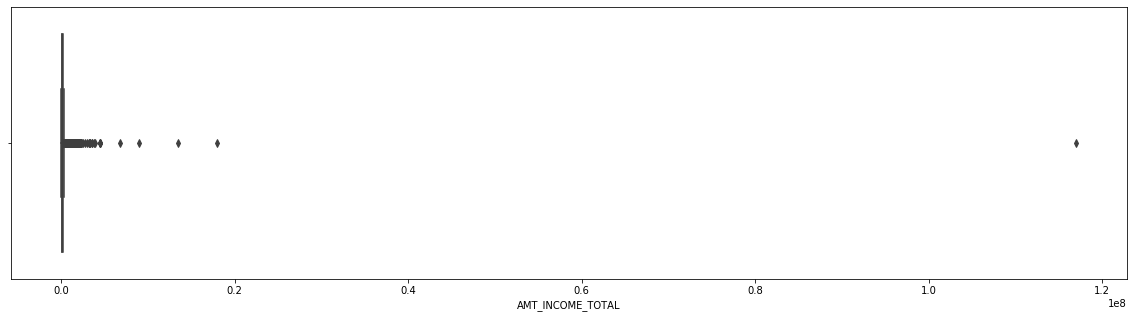

In [16]:
# Boxplot to find out the data distribution of columns 
import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(x=df.AMT_INCOME_TOTAL)
#sns.boxplot(df['AMT_INCOME_TOTAL'])

In [17]:
## Clearly AMT_INCOME_TOTAL has an outlier, lets remove them it by taking only 99 percentile data 

In [18]:
# Have only 99 percentile data out of total
df=df[df.AMT_INCOME_TOTAL<np.percentile(df.AMT_INCOME_TOTAL,99)]

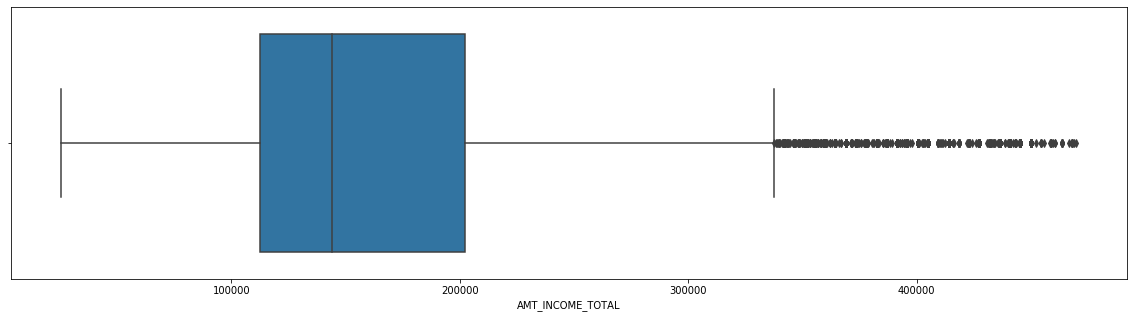

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['AMT_INCOME_TOTAL'])

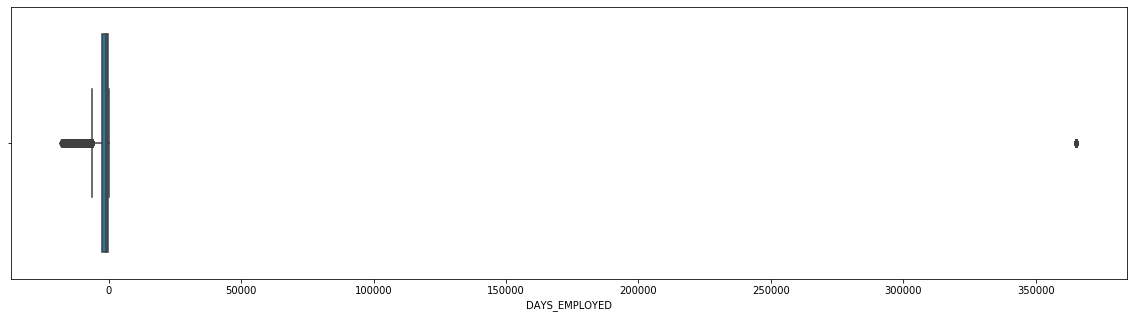

In [20]:
# Lets check the same for Days_employed
plt.figure(figsize=(20,5))
sns.boxplot(x=df.DAYS_EMPLOYED)

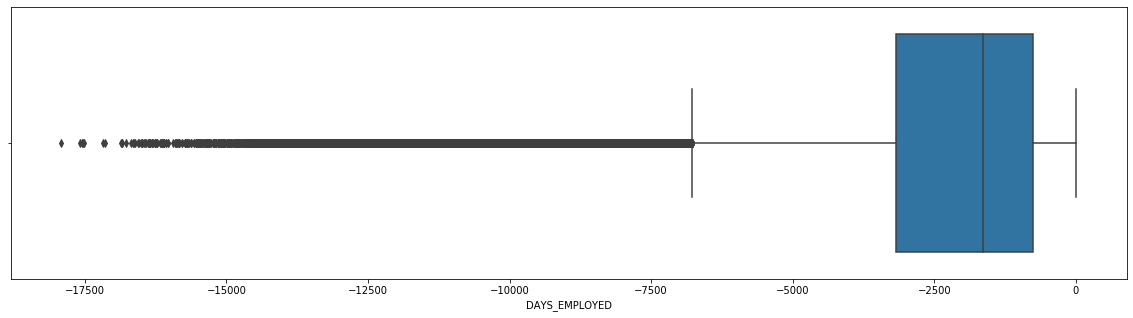

In [21]:
#Post outlier removal for Days_employed
df=df[df.DAYS_EMPLOYED<np.percentile(df.DAYS_EMPLOYED,99)]
plt.figure(figsize=(20,5))
sns.boxplot(x=df.DAYS_EMPLOYED)

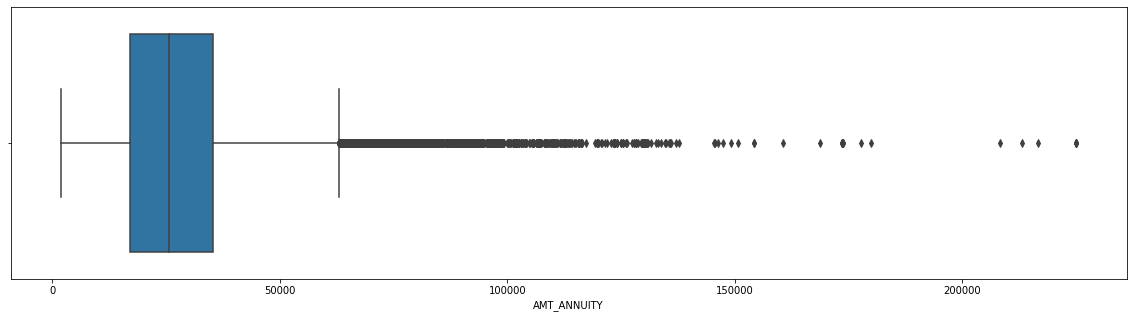

In [22]:
#Lets check the same for AMT_ANNUITY

plt.figure(figsize=(20,5))
sns.boxplot(x=df.AMT_ANNUITY)

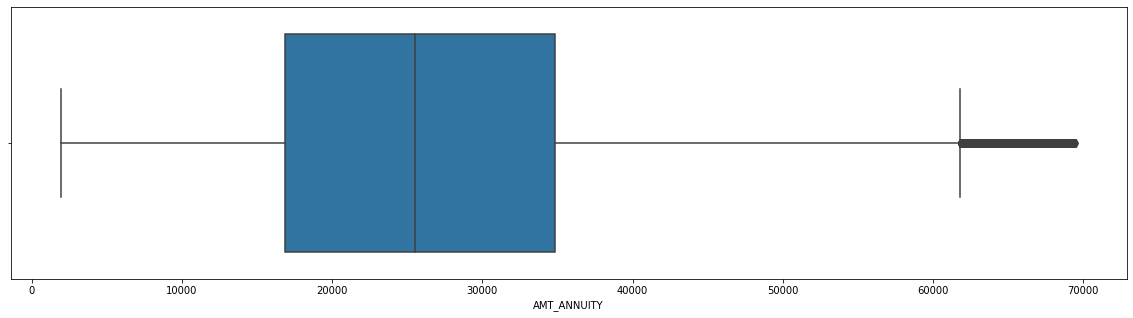

In [23]:
#Post outlier removal for AMT_ANNUITY
df=df[df.AMT_ANNUITY<np.percentile(df.AMT_ANNUITY,99)]
plt.figure(figsize=(20,5))
sns.boxplot(x=df.AMT_ANNUITY)

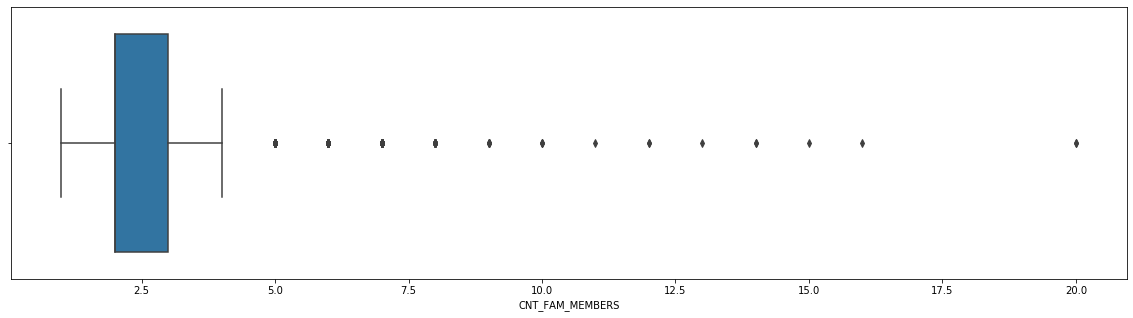

In [24]:
#Lets check the same for CNT_FAM_MEMBERS
plt.figure(figsize=(20,5))
sns.boxplot(x=df.CNT_FAM_MEMBERS)

In [25]:
df.drop([])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,0.139376,0.0000,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,0.535276,0.0039,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.729567,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.650442,0.535276,0.0000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,1.0,2,2,THURSDAY,11,Religion,0.322738,0.535276,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,Sales staff,1.0,2,2,WEDNESDAY,11,Self-employed,0.530725,0.535276,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,Sales staff,1.0,1,1,THURSDAY,15,Services,0.681632,0.535276,0.0757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,Managers,1.0,3,3,THURSDAY,9,School,0.535722,0.218859,0.0000,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,Laborers,2.0,2,2,WEDNESDAY,9,Business Entity Type 1,0.514163,0.661024,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Find imbalance percentage
# Defaulter % is approx 9% and non-defaulter % is 91%

df['TARGET'].value_counts(normalize=True) * 100

0    91.257336
1     8.742664
Name: TARGET, dtype: float64

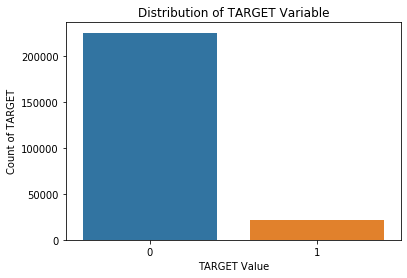

In [27]:
sns.countplot(df.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

### Univariate Analysis for Continous Variable showing the Defaulter and non Defaulter side by side

In [28]:
# Lets bin the dataframe as Very High,High, medium, low, Very Low based on Credit amount
# Taking quantile values 0,0.10,0.35,0.50,0.90 and 1 for binning
bin_labels_5 = ['Very Low','Low', 'Medium', 'High','Very High']
df['AMT_CREDIT_Category'] = pd.qcut(df['AMT_CREDIT'], q=[0,0.10,0.35,0.50,0.90,1],labels=bin_labels_5)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,0.139376,0.0000,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,0.535276,0.0039,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.729567,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.650442,0.535276,0.0000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,1.0,2,2,THURSDAY,11,Religion,0.322738,0.535276,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,Sales staff,1.0,2,2,WEDNESDAY,11,Self-employed,0.530725,0.535276,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,Sales staff,1.0,1,1,THURSDAY,15,Services,0.681632,0.535276,0.0757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,Managers,1.0,3,3,THURSDAY,9,School,0.535722,0.218859,0.0000,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,High
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,Laborers,2.0,2,2,WEDNESDAY,9,Business Entity Type 1,0.514163,0.661024,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium


In [29]:
df1 = df[df['TARGET'] == 1]

In [30]:
df2 = df[df['TARGET'] == 0]

In [31]:
df['Income_Category'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=[0,0.10,0.35,0.50,0.90,1],labels=bin_labels_5)
df1 = df[df['TARGET'] == 1]
df2 = df[df['TARGET'] == 0]

In [32]:
df['Annuity_Category'] = pd.qcut(df['AMT_ANNUITY'], q=[0,0.10,0.35,0.50,0.90,1],labels=bin_labels_5)
df1 = df[df['TARGET'] == 1]
df2 = df[df['TARGET'] == 0]

In [33]:
df['Goods_Category'] = pd.qcut(df['AMT_GOODS_PRICE'], q=[0,0.10,0.35,0.50,0.90,1],labels=bin_labels_5)
df1 = df[df['TARGET'] == 1]
df2 = df[df['TARGET'] == 0]

In [34]:
df['Age_Category'] = pd.qcut(df['DAYS_BIRTH'], q=[0,0.10,0.35,0.50,0.90,1],labels=bin_labels_5)
df1 = df[df['TARGET'] == 1]
df2 = df[df['TARGET'] == 0]

Comparing below continous variables for Dfaulter and Non-defaulters to idetify the pattern. i.e.
1) AMT_CREDIT 2) AMT_INCOME_TOTAL 3)AMT_ANNUITY 4) AMT_GOODS_PRICE  5)DAYS_BIRTH (Age)

<function matplotlib.pyplot.show(*args, **kw)>

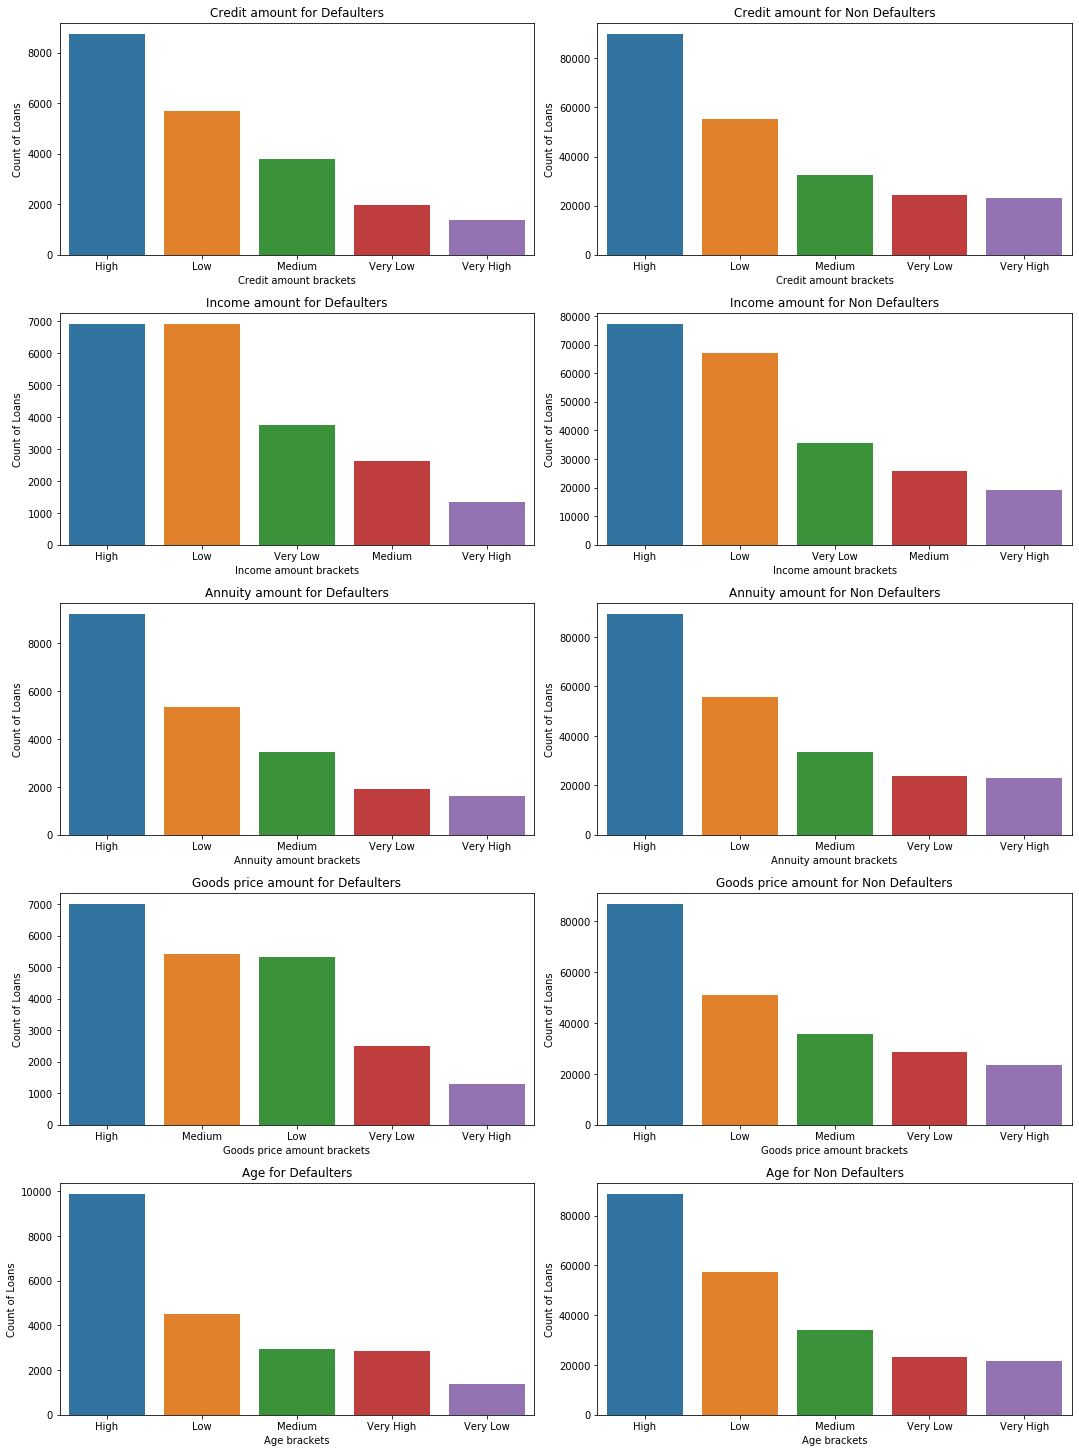

In [35]:
fig = plt.figure(figsize=(15,40))

plt.subplot(10,2,1)
sns.countplot(x=df1['AMT_CREDIT_Category'], data=df1, order= df1['AMT_CREDIT_Category'].value_counts().index)
plt.title('Credit amount for Defaulters')
plt.xlabel('Credit amount brackets')
plt.ylabel('Count of Loans')
plt.tight_layout()

plt.subplot(10,2,2)
sns.countplot(x=df2['AMT_CREDIT_Category'], data=df2, order= df2['AMT_CREDIT_Category'].value_counts().index)
plt.title('Credit amount for Non Defaulters')
plt.xlabel('Credit amount brackets')
plt.ylabel('Count of Loans')
plt.tight_layout()

plt.subplot(10,2,3)
sns.countplot(x=df1['Income_Category'], data=df1, order= df1['Income_Category'].value_counts().index)
plt.title('Income amount for Defaulters')
plt.xlabel('Income amount brackets')
plt.ylabel('Count of Loans')
plt.tight_layout()

plt.subplot(10,2,4)
sns.countplot(x=df2['Income_Category'], data=df2, order= df2['Income_Category'].value_counts().index)
plt.title('Income amount for Non Defaulters')
plt.xlabel('Income amount brackets')
plt.ylabel('Count of Loans')
plt.show
plt.tight_layout()

plt.subplot(10,2,5)
sns.countplot(x=df1['Annuity_Category'], data=df1, order= df1['Annuity_Category'].value_counts().index)
plt.title('Annuity amount for Defaulters')
plt.xlabel('Annuity amount brackets')
plt.ylabel('Count of Loans')

plt.subplot(10,2,6)
sns.countplot(x=df2['Annuity_Category'], data=df2, order= df2['Annuity_Category'].value_counts().index)
plt.title('Annuity amount for Non Defaulters')
plt.xlabel('Annuity amount brackets')
plt.ylabel('Count of Loans')
plt.show

plt.subplot(10,2,7)
sns.countplot(x=df1['Goods_Category'], data=df1, order= df1['Goods_Category'].value_counts().index)
plt.title('Goods price amount for Defaulters')
plt.xlabel('Goods price amount brackets')
plt.ylabel('Count of Loans')

plt.subplot(10,2,8)
sns.countplot(x=df2['Goods_Category'], data=df2, order= df2['Goods_Category'].value_counts().index)
plt.title('Goods price amount for Non Defaulters')
plt.xlabel('Goods price amount brackets')
plt.ylabel('Count of Loans')
plt.show

plt.subplot(10,2,9)
sns.countplot(x=df1['Age_Category'], data=df1, order= df1['Age_Category'].value_counts().index)
plt.title('Age for Defaulters')
plt.xlabel('Age brackets')
plt.ylabel('Count of Loans')

plt.subplot(10,2,10)
sns.countplot(x=df2['Age_Category'], data=df2, order= df2['Age_Category'].value_counts().index)
plt.title('Age for Non Defaulters')
plt.xlabel('Age brackets')
plt.ylabel('Count of Loans')
plt.show

##### 1) From the countplots it has been observed that there is no specific diffrentiative pattern for above variables between Defaulter and Non-defaulter. Lets plot distribution plot for the same 2) There is High demand of High credit amount from defaulters as well as Non-defaulter

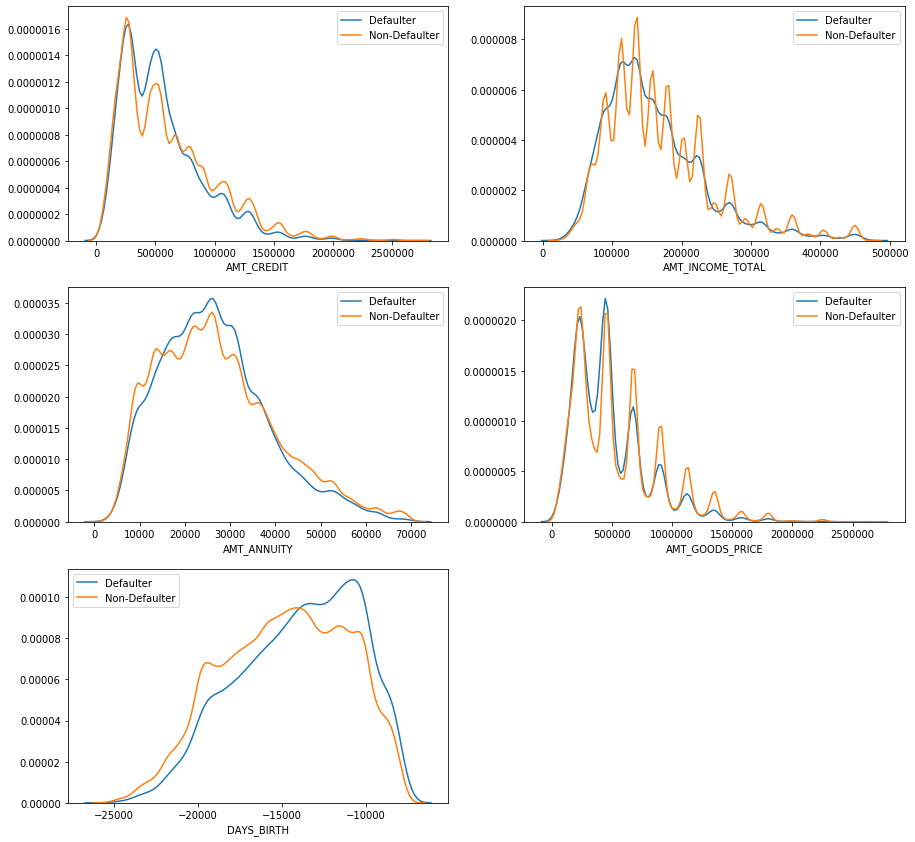

In [42]:
# Plotting distribution plot for the 5 variables

fig = plt.figure(figsize=(15,25))


plt.subplot(5,2,1)
sns.distplot(df1['AMT_CREDIT'],hist=False, label='Defaulter')
sns.distplot(df2['AMT_CREDIT'],hist=False, label='Non-Defaulter')
plt.legend(loc='upper right')

plt.subplot(5,2,2)
sns.distplot(df1['AMT_INCOME_TOTAL'],hist=False, label='Defaulter')
sns.distplot(df2['AMT_INCOME_TOTAL'],hist=False, label='Non-Defaulter')
plt.legend(loc='upper right')

plt.subplot(5,2,3)
sns.distplot(df1['AMT_ANNUITY'],hist=False, label='Defaulter')
sns.distplot(df2['AMT_ANNUITY'],hist=False, label='Non-Defaulter')
plt.legend(loc='upper right')

plt.subplot(5,2,4)
sns.distplot(df1['AMT_GOODS_PRICE'],hist=False, label='Defaulter')
sns.distplot(df2['AMT_GOODS_PRICE'],hist=False, label='Non-Defaulter')
plt.legend(loc='upper right')

plt.subplot(5,2,5)
sns.distplot(df1['DAYS_BIRTH'],hist=False, label='Defaulter')
sns.distplot(df2['DAYS_BIRTH'],hist=False, label='Non-Defaulter')
plt.legend(loc='upper left')


#For Amount_Credit, Amount_Annuity and Amount_Goods price, distribution is similar
#For Amount_Income and Days_Birth, there is a differenece in pattern
#Amount_Income Total = There is a large spike at regular interval of Income Amount for Non defaulter, so income amount is steady compare to non defaulters
#Days_Birth = Probability of being defaulters at lower Age is much higher than than higher Age

### Univariate analysis of Categorical variables for Defaulter and Non-defaulters to idetify the pattern
Lets consider Categorical variables i.e. NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE,NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE, Amount Credit Category

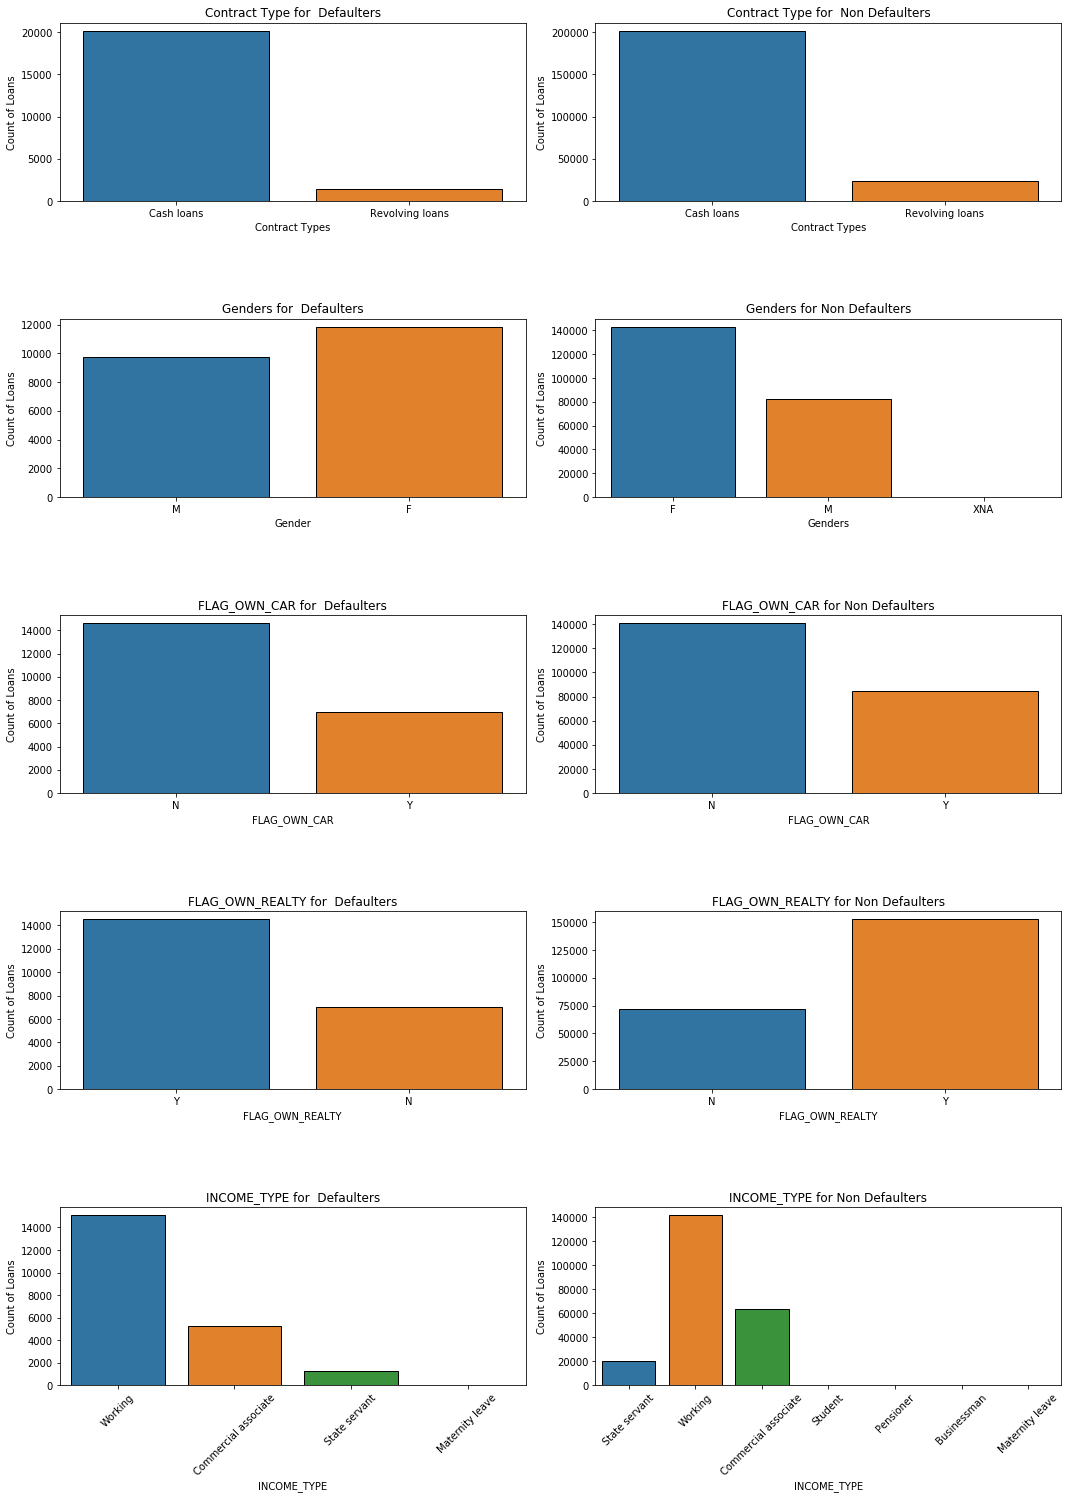

In [43]:
fig = plt.figure(figsize=(15,40))
plt.subplot(10,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df1, edgecolor = 'black' )
plt.title('Contract Type for  Defaulters')
plt.xlabel('Contract Types')
plt.ylabel('Count of Loans')

plt.subplot(10,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df2, edgecolor = 'black' )
plt.title('Contract Type for  Non Defaulters')
plt.xlabel('Contract Types')
plt.ylabel('Count of Loans')

plt.subplot(10,2,3)
sns.countplot(x = 'CODE_GENDER', data = df1, edgecolor = 'black')
plt.title('Genders for  Defaulters')
plt.xlabel('Gender')
plt.ylabel('Count of Loans')

plt.subplot(10,2,4)
sns.countplot(x = 'CODE_GENDER', data = df2, edgecolor = 'black')
plt.title('Genders for Non Defaulters')
plt.xlabel('Genders')
plt.ylabel('Count of Loans')

plt.subplot(10,2,5)
sns.countplot(x = 'FLAG_OWN_CAR', data = df1, edgecolor = 'black')
plt.title('FLAG_OWN_CAR for  Defaulters')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Count of Loans')

plt.subplot(10,2,6)
sns.countplot(x = 'FLAG_OWN_CAR', data = df2, edgecolor = 'black')
plt.title('FLAG_OWN_CAR for Non Defaulters')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Count of Loans')

plt.show
plt.subplot(10,2,7)
sns.countplot(x = 'FLAG_OWN_REALTY', data = df1, edgecolor = 'black')
plt.title('FLAG_OWN_REALTY for  Defaulters')
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Count of Loans')

plt.subplot(10,2,8)
sns.countplot(x = 'FLAG_OWN_REALTY', data = df2, edgecolor = 'black')
plt.title('FLAG_OWN_REALTY for Non Defaulters')
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Count of Loans')

plt.subplot(10,2,9)
sns.countplot(x = 'NAME_INCOME_TYPE', data = df1, edgecolor = 'black')
plt.title('INCOME_TYPE for  Defaulters')
plt.xlabel('INCOME_TYPE')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)

plt.subplot(10,2,10)
sns.countplot(x = 'NAME_INCOME_TYPE', data = df2, edgecolor = 'black')
plt.title('INCOME_TYPE for Non Defaulters')
plt.xlabel('INCOME_TYPE')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

1) From the graphs of Contract type we can see that the Revolving loans are small amount compared to Cash loans
2) The women defaulters are more than men
3) Number of defaulters having own car and realty are less compare to defaulters who does not own anything hence these are not directly impacting factors
4) By observing income type; working personnel are more defaulter compare to Commercial associates and state governments, more than 60% consumers are working personnel hence we can not say there are more chances that working personnel are defaulters

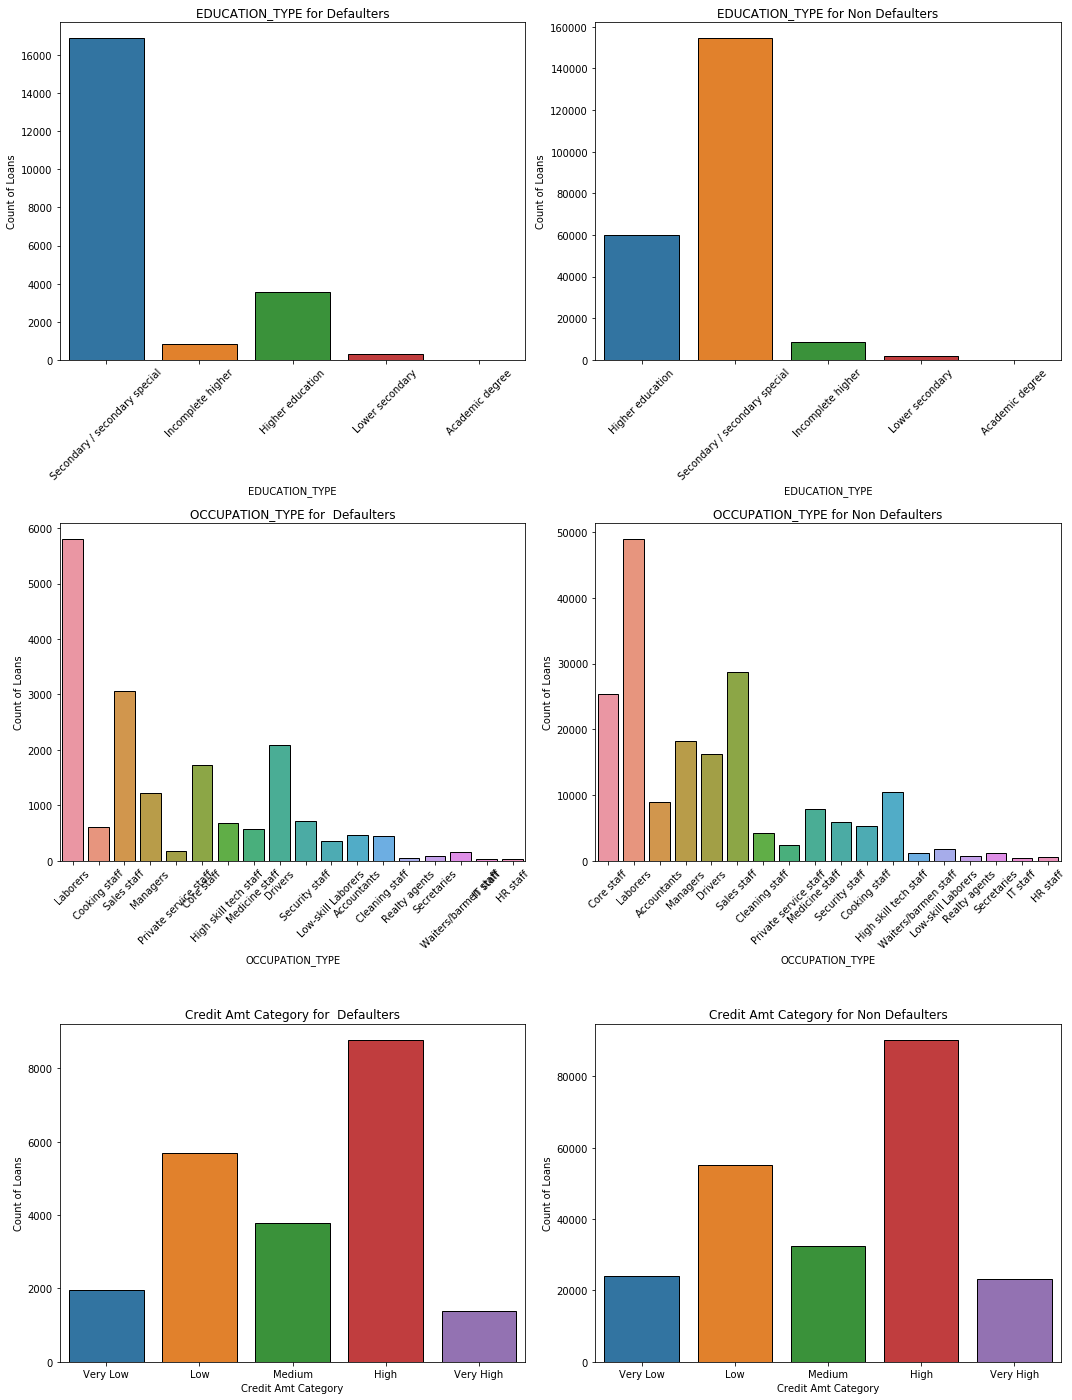

In [44]:
fig = plt.figure(figsize=(15,40))

plt.subplot(6,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = df1, edgecolor = 'black')
plt.title('EDUCATION_TYPE for Defaulters')
plt.xlabel('EDUCATION_TYPE')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.subplot(6,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = df2, edgecolor = 'black')
plt.title('EDUCATION_TYPE for Non Defaulters')
plt.xlabel('EDUCATION_TYPE')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.subplot(6,2,3)
sns.countplot(x = 'OCCUPATION_TYPE', data = df1, edgecolor = 'black')
plt.title('OCCUPATION_TYPE for  Defaulters')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.subplot(6,2,4)
sns.countplot(x = 'OCCUPATION_TYPE', data = df2, edgecolor = 'black')
plt.title('OCCUPATION_TYPE for Non Defaulters')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
fig.tight_layout()
plt.subplot(6,2,5)
sns.countplot(x = 'AMT_CREDIT_Category', data = df1, edgecolor = 'black')
plt.title('Credit Amt Category for  Defaulters')
plt.xlabel('Credit Amt Category')
plt.ylabel('Count of Loans')
fig.tight_layout()
plt.subplot(6,2,6)
sns.countplot(x = 'AMT_CREDIT_Category', data = df2, edgecolor = 'black')
plt.title('Credit Amt Category for Non Defaulters')
plt.xlabel('Credit Amt Category')
plt.ylabel('Count of Loans')
plt.show()

1) By observing education type; consumer educated till secondary/secondary special are more defaulter compare to other qualification levels but 70% consumers are studied till secondary/secondary special hence we can not say there are more chances that these category would be having more defaulters
2) Similar patterns has been observed for Occupation type

### Showing Univariate Analysis for Categorical Variable for defaulter and non defaulters

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

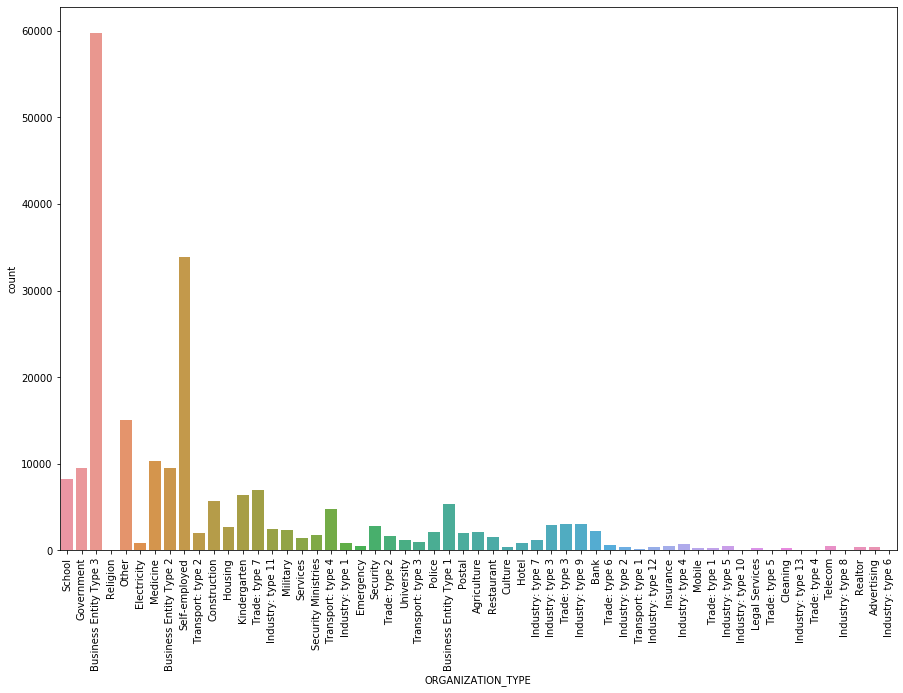

In [45]:
# Since there are multiple values for Organization type we are plotting it seperately for Target 0 i.e. Non-defaulter

plt.figure(figsize=(15,10))
sns.countplot(x = 'ORGANIZATION_TYPE', data = df2 )
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

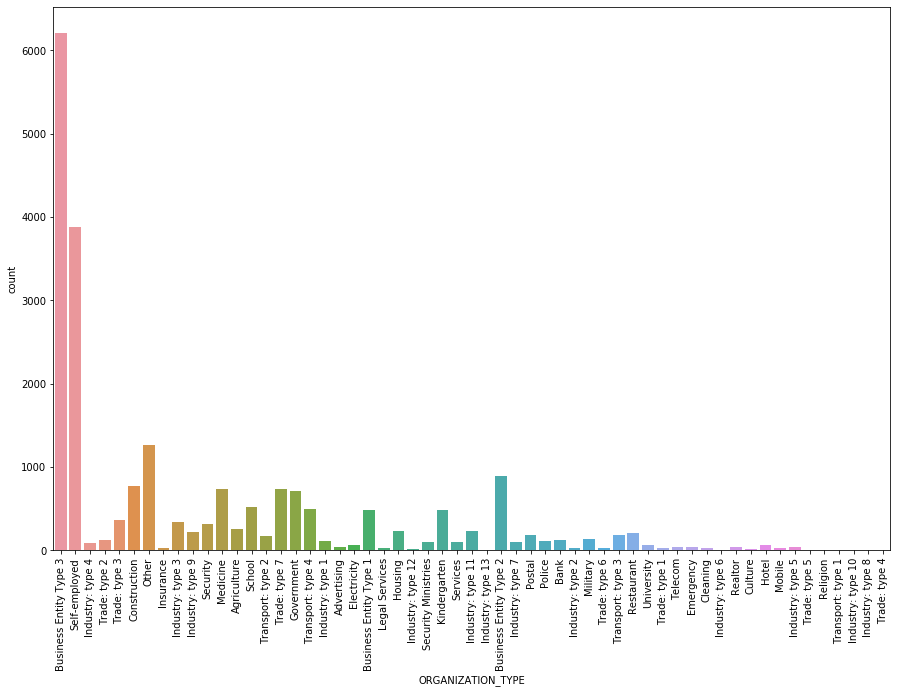

In [46]:
# Since there are multiple values for Organization type we are plotting it seperately for Target 1 i.e. defaulter

plt.figure(figsize=(15,10))
sns.countplot(x = 'ORGANIZATION_TYPE', data = df1 )
plt.xticks(rotation=90)


From above graphs of Org type of defaulter and Non-defaulter, it can be seen that most of the application are received from "Business Entity type 3"

In [47]:
# Multivariate Analysis
# Two continous columns for TARGET 1 i.e. Defaulters

num = ['int64','float64']
newdf1 = df1.select_dtypes(include = num)
newdf1.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,1.0,2,2,10,0.262949,0.139376,0.0000,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,1.0,3,2,9,0.548477,0.190706,0.0000,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,2.0,2,2,9,0.306841,0.320163,0.0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,2.0,3,3,11,0.674203,0.399676,0.0000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
94,100112,1,0,315000.0,953460.0,64107.0,900000.0,0.030755,-10199,-2015,-4802.0,1.0,2,2,13,0.432340,0.077499,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [48]:
# Lets drop few columns which are not significant to find out the correlation because most of them shows indicators and ID`s

newdf1.drop(["SK_ID_CURR","TARGET","CNT_CHILDREN","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"], axis = 1, inplace = True)
newdf1

C:\Users\Aditi\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,1.0,0.262949,0.139376,0.0000
26,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,1.0,0.548477,0.190706,0.0000
40,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,2.0,0.306841,0.320163,0.0039
42,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,2.0,0.674203,0.399676,0.0000
94,315000.0,953460.0,64107.0,900000.0,0.030755,-10199,-2015,-4802.0,1.0,0.432340,0.077499,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
307448,207000.0,450000.0,32746.5,450000.0,0.020246,-9918,-3048,-8507.0,3.0,0.329708,0.360613,0.0000
307475,144000.0,1303200.0,46809.0,1125000.0,0.007330,-13416,-2405,-500.0,3.0,0.583214,0.424130,0.0078
307481,225000.0,297000.0,19975.5,297000.0,0.008575,-20644,-3147,-8921.0,2.0,0.713524,0.511892,0.0000
307489,225000.0,521280.0,23089.5,450000.0,0.014464,-16471,-286,-8291.0,2.0,0.615261,0.397946,0.0000


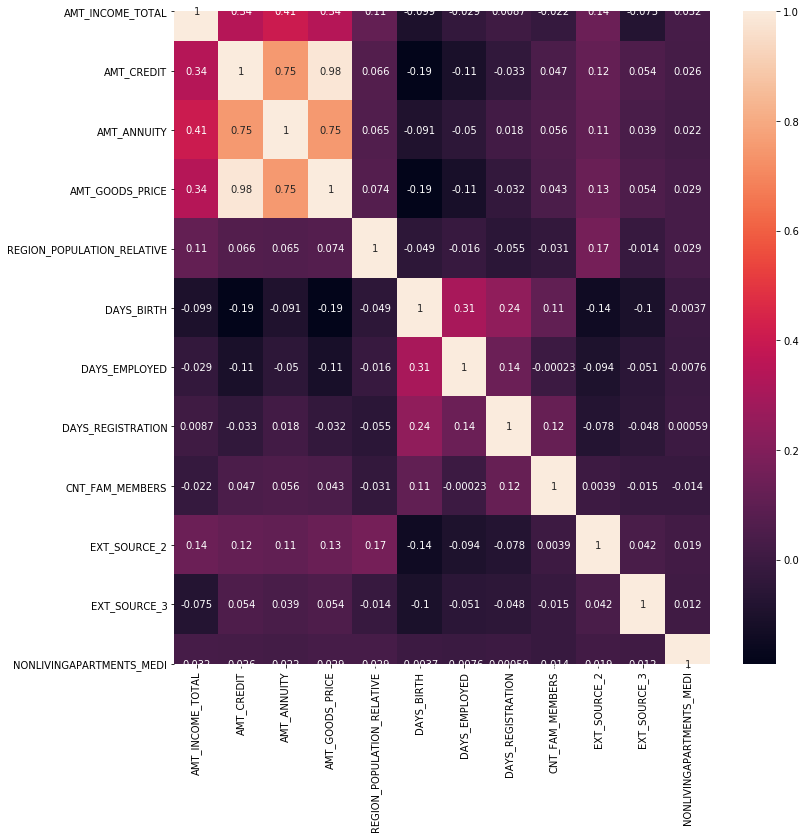

In [49]:
# Plot the correlation

corr_mat = newdf1.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat, annot=True)


In [50]:
corr_mat = newdf1.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset=['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
37,AMT_GOODS_PRICE,AMT_CREDIT,0.981695
25,AMT_ANNUITY,AMT_CREDIT,0.752923
38,AMT_GOODS_PRICE,AMT_ANNUITY,0.749819
24,AMT_ANNUITY,AMT_INCOME_TOTAL,0.408354
36,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.343128
...,...,...,...
138,NONLIVINGAPARTMENTS_MEDI,DAYS_EMPLOYED,0.007580
116,EXT_SOURCE_2,CNT_FAM_MEMBERS,0.003929
137,NONLIVINGAPARTMENTS_MEDI,DAYS_BIRTH,0.003726
139,NONLIVINGAPARTMENTS_MEDI,DAYS_REGISTRATION,0.000588


#### Top 5 Correlated Variables for Defaulters
1) Amount Goods price and Amount Credits - Very strong correlation
2) Amount Annuity and Amount Credits - Strong correlation
3) Amount Goods price and Amount Annuity - Strong correlation
4) Amount Annuity and Amount total income - Moderate correlation
5) Amount Goods price and Aamount Credits - Moderate correlation
#### Bottom 5 Correlated Variables for Defaulters
1) NONLIVINGAPARTMENTS_MEDI and Days Registration
2) NONLIVINGAPARTMENTS_MEDI and Days Birth
3) Ext source 2 and Count of Family Members
4) NONLIVINGAPARTMENTS_MEDI and Days Employed
5) Ext source 3 and Region population relative

In [51]:
# Multivariate Analysis
# Two continous columns for TARGET 0

num = ['int64','float64']
newdf2 = df2.select_dtypes(include = num)
newdf2.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,1,1,11,0.622246,0.535276,0.0039,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,1.0,2,2,9,0.555912,0.729567,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,2.0,2,2,17,0.650442,0.535276,0.0000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,1.0,2,2,11,0.322738,0.535276,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,2.0,2,2,16,0.354225,0.621226,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [52]:
# Lets drop few columns which are not significant to find out the correlation

newdf2.drop(["SK_ID_CURR","TARGET","CNT_CHILDREN","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"], axis = 1, inplace = True)
newdf2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,0.622246,0.535276,0.0039
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,1.0,0.555912,0.729567,0.0000
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,2.0,0.650442,0.535276,0.0000
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,1.0,0.322738,0.535276,0.0000
5,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,2.0,0.354225,0.621226,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
307503,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,-675.0,1.0,0.501221,0.609276,0.0000
307504,153000.0,331920.0,16096.5,225000.0,0.022625,-16705,-7258,-9798.0,1.0,0.530725,0.535276,0.0000
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,1.0,0.681632,0.535276,0.0757
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,1.0,0.535722,0.218859,0.0000


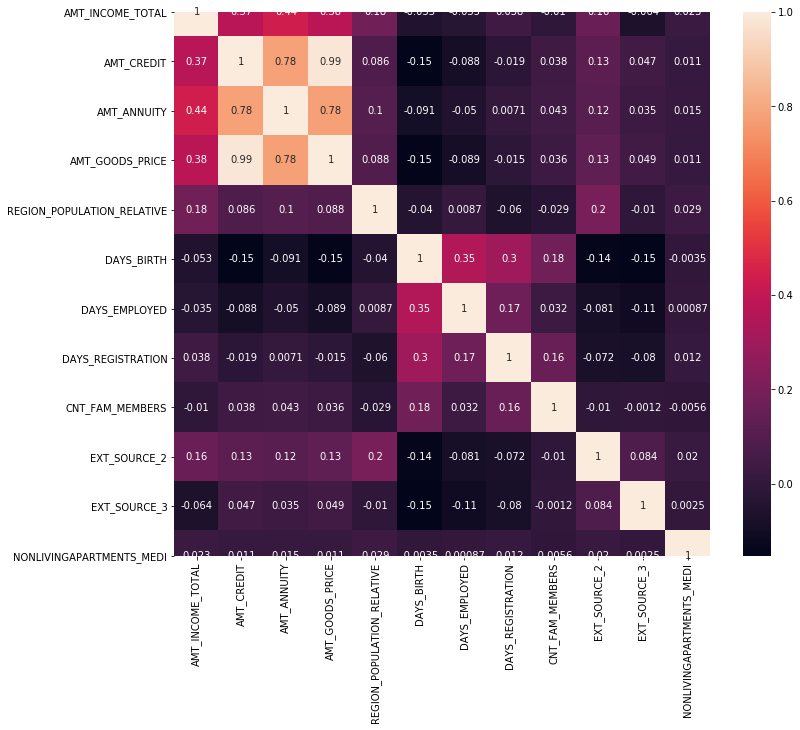

In [53]:
# Plot the correlation

corr_mat = newdf2.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_mat, annot=True)

In [54]:
corr_mat = newdf2.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset=['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
37,AMT_GOODS_PRICE,AMT_CREDIT,0.985666
25,AMT_ANNUITY,AMT_CREDIT,0.779432
38,AMT_GOODS_PRICE,AMT_ANNUITY,0.777880
24,AMT_ANNUITY,AMT_INCOME_TOTAL,0.441088
36,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.375727
...,...,...,...
140,NONLIVINGAPARTMENTS_MEDI,CNT_FAM_MEMBERS,0.005608
137,NONLIVINGAPARTMENTS_MEDI,DAYS_BIRTH,0.003543
142,NONLIVINGAPARTMENTS_MEDI,EXT_SOURCE_3,0.002479
128,EXT_SOURCE_3,CNT_FAM_MEMBERS,0.001228


#### Top 5 Correlated Variables for Non-Defaulters
1) Amount Goods price and Amount Credits
2) Amount Annuity and Amount Credits 
3) Amount Goods price and Amount Annuity 
4) Amount Annuity and Amount total income 
5) Amount Goods price and Aamount Credits 

#### Bottom 5 Correlated Variables for Non - Defaulters
1) NONLIVINGAPARTMENTS_MEDI and Ext source 3
2) NONLIVINGAPARTMENTS_MEDI and Days Employed
3) Ext source 2 and Count of Family Members
4) NONLIVINGAPARTMENTS_MEDI and Days Birth
5) Count of Family Members and Totl Income amount

#### For Both Defaulter and Non defaulter, top 5 correlated vriables are same but correlation factors non-defaulters are higher than the defaulters

## Stage: 2 Upload previous data and perform analysis

### Step 1: Upload the Data

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
x = 'previous_application.csv'
num_lines = sum(1 for i in open(x))
size = int(num_lines//1.2)

random.seed(100)
skip_id = random.sample(range(1, num_lines), (num_lines-size))
previous_data = pd.read_csv(x, skiprows=skip_id )

#previous_data = pd.read_csv('previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: A quick look at different columns and there structure for understanding data  

In [56]:
previous_data.shape

(873812, 37)

In [57]:
previous_data.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [58]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [59]:
# NAME_CONTRACT_STATUS given quick look at statsu of previous loan applicants
previous_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

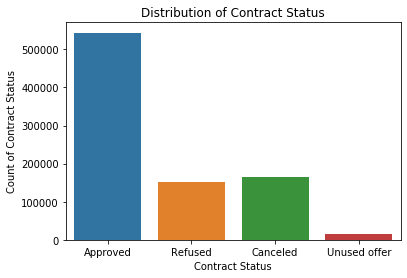

In [60]:
#plot the previous loan status of applicants
import seaborn as sns
sns.countplot(previous_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [61]:
# Percentage NULLs in each column
previous_data.isnull().sum().sort_values(ascending=False)*100 / len(previous_data)

RATE_INTEREST_PRIVILEGED       99.645690
RATE_INTEREST_PRIMARY          99.645690
RATE_DOWN_PAYMENT              53.338476
AMT_DOWN_PAYMENT               53.338476
NAME_TYPE_SUITE                49.124983
DAYS_TERMINATION               40.144791
NFLAG_INSURED_ON_APPROVAL      40.144791
DAYS_FIRST_DRAWING             40.144791
DAYS_FIRST_DUE                 40.144791
DAYS_LAST_DUE_1ST_VERSION      40.144791
DAYS_LAST_DUE                  40.144791
AMT_GOODS_PRICE                22.985379
AMT_ANNUITY                    22.229610
CNT_PAYMENT                    22.229267
PRODUCT_COMBINATION             0.021286
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

### Step 3: Clean up the data by removing unwanted columns and columns with high % nulls values 

In [62]:
#dropping columns with more than 55% missing values
previous_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1,inplace=True)
previous_data.isnull().sum().sort_values(ascending=False)*100 / len(previous_data)

RATE_DOWN_PAYMENT              53.338476
AMT_DOWN_PAYMENT               53.338476
NAME_TYPE_SUITE                49.124983
NFLAG_INSURED_ON_APPROVAL      40.144791
DAYS_LAST_DUE                  40.144791
DAYS_LAST_DUE_1ST_VERSION      40.144791
DAYS_FIRST_DUE                 40.144791
DAYS_FIRST_DRAWING             40.144791
DAYS_TERMINATION               40.144791
AMT_GOODS_PRICE                22.985379
AMT_ANNUITY                    22.229610
CNT_PAYMENT                    22.229267
PRODUCT_COMBINATION             0.021286
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
CODE_REJECT_REASON              0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION   

In [63]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,8.738120e+05,873812.000000,679567.000000,8.738120e+05,8.738120e+05,4.077340e+05,6.729630e+05,873812.000000,873812.000000,407734.000000,873812.000000,8.738120e+05,679570.000000,523022.000000,523022.000000,523022.000000,523022.000000,523022.000000,523022.000000
mean,1.922471e+06,278390.329226,15891.719513,1.741998e+05,1.949518e+05,6.691024e+03,2.262147e+05,12.483073,0.996428,0.079657,-882.634988,3.124141e+02,16.000050,342416.915321,13821.778772,33594.026475,76576.985960,81998.602522,0.331424
std,5.327661e+05,102862.276787,14754.876220,2.907670e+05,3.166801e+05,2.024570e+04,3.130940e+05,3.332885,0.059657,0.107921,779.640219,6.291800e+03,14.509292,88542.566456,72435.186168,106616.434216,149644.216604,153308.312100,0.470726
min,1.000001e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000,0.000000,-0.000014,-2922.000000,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460349e+06,189315.750000,6305.715000,1.890000e+04,2.428200e+04,0.000000e+00,5.062050e+04,10.000000,1.000000,0.000000,-1305.000000,-1.000000e+00,6.000000,365243.000000,-1629.000000,-1243.000000,-1315.000000,-1270.000000,0.000000
50%,1.922994e+06,278766.000000,11250.000000,7.077771e+04,8.023950e+04,1.633500e+03,1.114875e+05,12.000000,1.000000,0.051338,-583.000000,4.000000e+00,12.000000,365243.000000,-831.000000,-362.000000,-538.000000,-500.000000,0.000000
75%,2.383671e+06,367698.250000,20533.117500,1.800000e+05,2.156400e+05,7.749675e+03,2.295000e+05,15.000000,1.000000,0.108909,-281.000000,8.500000e+01,24.000000,365243.000000,-411.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,456255.000000,418058.145000,6.905160e+06,6.905160e+06,2.135700e+06,6.905160e+06,23.000000,1.000000,0.989740,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [64]:
previous_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY     

### Step: 4 Perform Univariate analysis of segmented continuous variables against approved, refused and cancelled loans

In [65]:
# Splitting the dataframe into three categories for better understanding of previous loan status against categorical variables 
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']

In [66]:
# Calculate % of loans status
approved_percent=(len(approved)*100)/len(previous_data)
refused_percent=(len(refused)*100)/len(previous_data)
canceled_percent=(len(canceled)*100)/len(previous_data)
print("Percent of loans approved: ",round(approved_percent,2))
print("Percent of loans refused: ",round(refused_percent,2))
print("Percent of loans canceled_percent: ",round(canceled_percent,2))

Percent of loans approved:  62.21
Percent of loans refused:  17.38
Percent of loans canceled_percent:  18.81


#### Perform univariate analysis on the below Categorical variables
1. AMT_CREDIT
2. AMT_ANNUITY
3. AMT_APPLICATION

In [67]:
#Creating bins for AMT_CREDIT 
bin_labels_5 = ['Low', 'Medium', 'High','Very High']
previous_data['AMT_CREDIT_CATEGORY'] = pd.qcut(previous_data['AMT_CREDIT'], q=[0,0.45,0.70,0.90,1],labels=bin_labels_5)

In [68]:
# Splitting the dataframe into three categories for better understanding of previous loan status against categorical variables 
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']

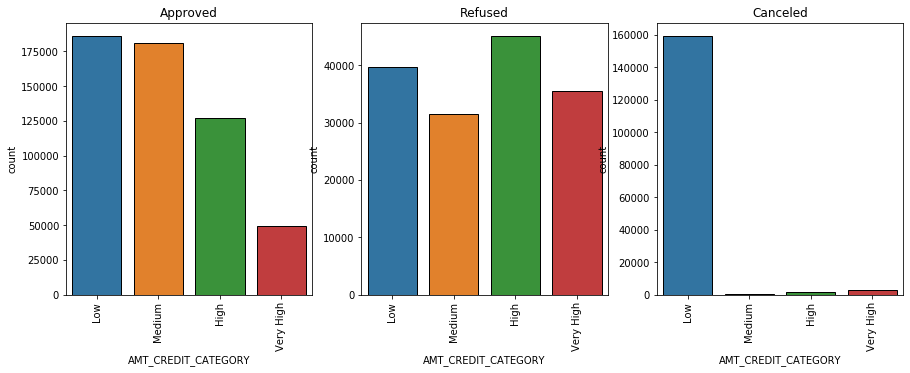

In [69]:
# Plotting of AMT_CREDIT_Categories against previous loan status 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['AMT_CREDIT_CATEGORY'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['AMT_CREDIT_CATEGORY'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['AMT_CREDIT_CATEGORY'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Canceled')
plt.show()

 From the above graph we can infer that
 1. Majority of Approved loans are for Low and Medium amount_credit, one reason could be high risk in very_high amount credits

In [70]:
# Analyse for AMT_ANNUITY
# Splitting the dataframe into three categories for better understanding of previous loan status against categorical variables 
previous_data['AMT_ANNUITY_CATEGORY'] = pd.qcut(previous_data['AMT_ANNUITY'], q=[0,0.45,0.70,0.90,1],labels=bin_labels_5)
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']

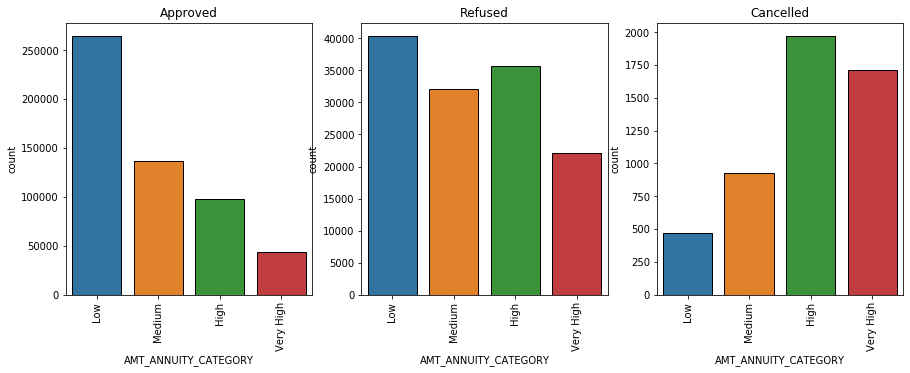

In [71]:
# Plotting of AMT_CREDIT_Categories against previous loan status 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['AMT_ANNUITY_CATEGORY'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['AMT_ANNUITY_CATEGORY'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['AMT_ANNUITY_CATEGORY'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Cancelled')
plt.show()

From the above, we can infer that,
1. For approved loans, majority of them have low Annuity amounts

In [72]:
# Analyse for AMT_APPLICATION
# Splitting the dataframe into three categories for better understanding of previous loan status against categorical variables 
previous_data['AMT_APPLICATION_CATEGORY'] = pd.qcut(previous_data['AMT_APPLICATION'], q=[0,0.45,0.70,0.90,1],labels=bin_labels_5)
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']

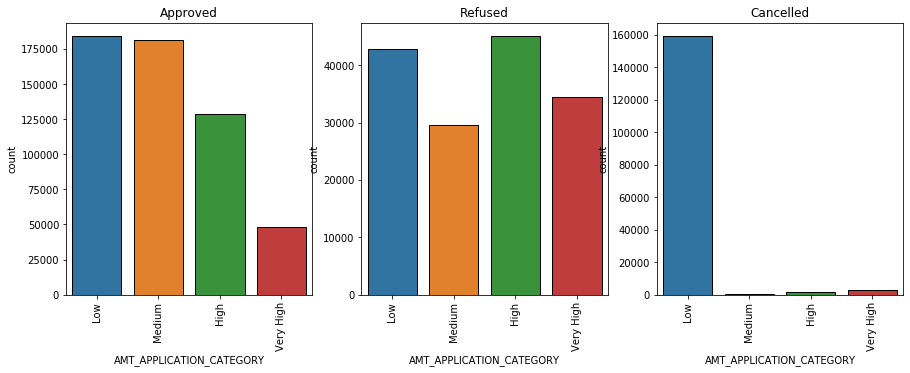

In [73]:
# Plotting of AMT_CREDIT_Categories against previous loan status 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['AMT_APPLICATION_CATEGORY'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['AMT_APPLICATION_CATEGORY'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['AMT_APPLICATION_CATEGORY'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Cancelled')
plt.show()

From the above, we can infer that,
1. Loans with low and medium application amounts are approved.
2. Refused loans has high percentage of High and Very high application amounts

### Step: 5 Univariate analysis of Categorical variables against approved, refused and cancelled loans

#### Lets perform the analysis of below Categorical Variables
1. PRODUCT_COMBINATION
2. NAME_PORTFOLIO
3. NAME_SELLER_INDUSTRY
4. NAME_CONTRACT_TYPE
5. NAME_PAYMENT_TYPE

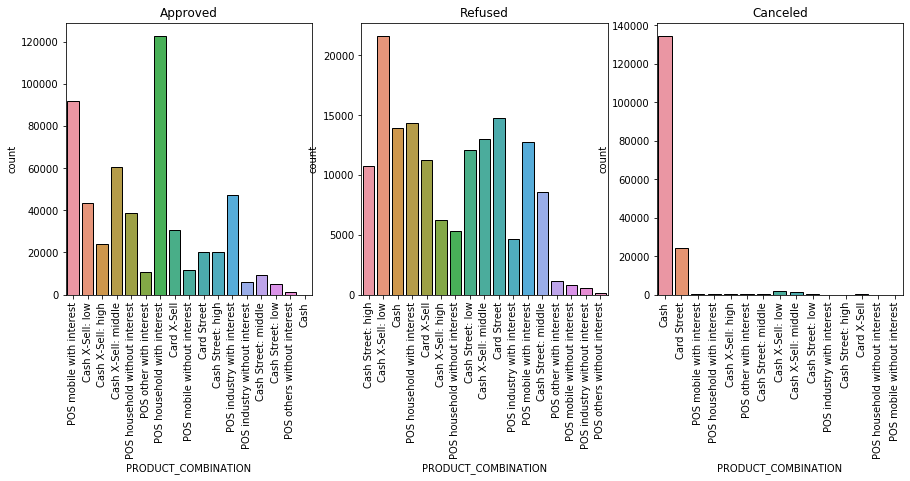

In [74]:
# Plotting of PRODUCT_COMBINATION against different loan status
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['PRODUCT_COMBINATION'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['PRODUCT_COMBINATION'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['PRODUCT_COMBINATION'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Canceled')
plt.show()


From the above chart, we can infer the below,
1. We observe most number of loans were approved for POS household with interest.
2. Most number of refused loans were of Cash X-Sell: Low Product combination
3. Most Canceled loans were Cash loans

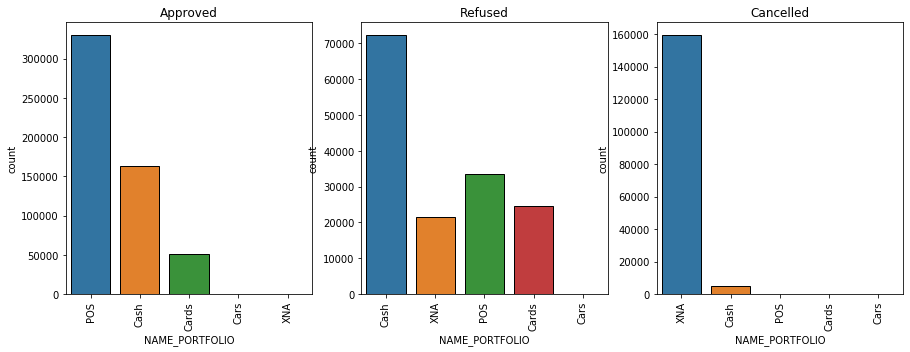

In [75]:
# Plotting of NAME_PORTFOLIO against different loan status
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['NAME_PORTFOLIO'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['NAME_PORTFOLIO'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['NAME_PORTFOLIO'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Cancelled')
plt.show()

From the above chart, we can infer the below,
1. Most approved loans are for POS
2. Most rejected loans are for Cash

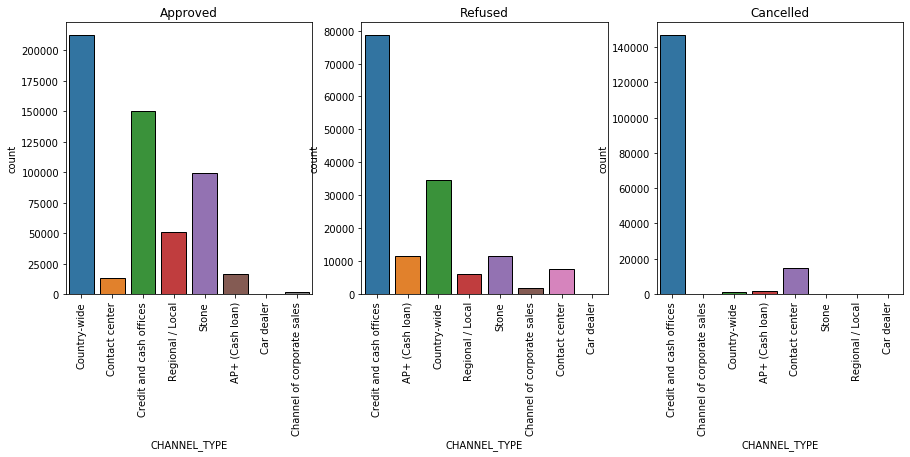

In [76]:
# Plotting of CHANNEL_TYPE against different loan status
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['CHANNEL_TYPE'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['CHANNEL_TYPE'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['CHANNEL_TYPE'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Cancelled')
plt.show()

1. Most approved loans were from Country-wide Channel
2. Most refused loans were from Credit and Cash Offices Channel

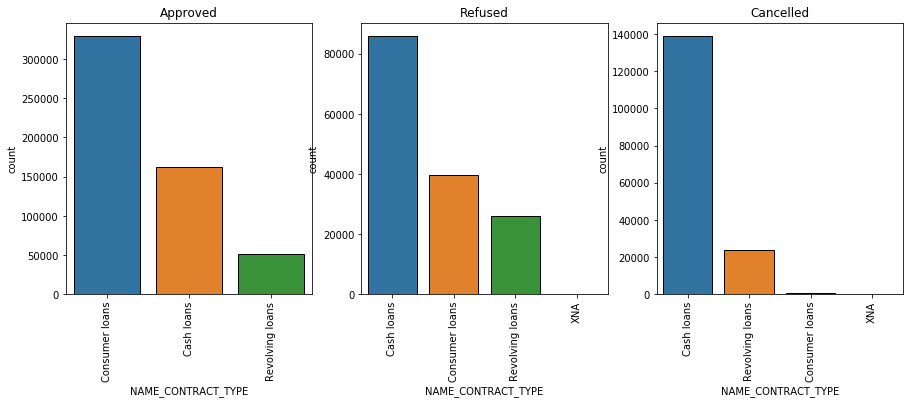

In [77]:
# Plotting of NAME_CONTRACT_TYPE against different loan status
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['NAME_CONTRACT_TYPE'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['NAME_CONTRACT_TYPE'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['NAME_CONTRACT_TYPE'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Cancelled')
plt.show()

1. Most of the approved contract types are Consumer loans
2. Most of the rejected contract types are Cash loans

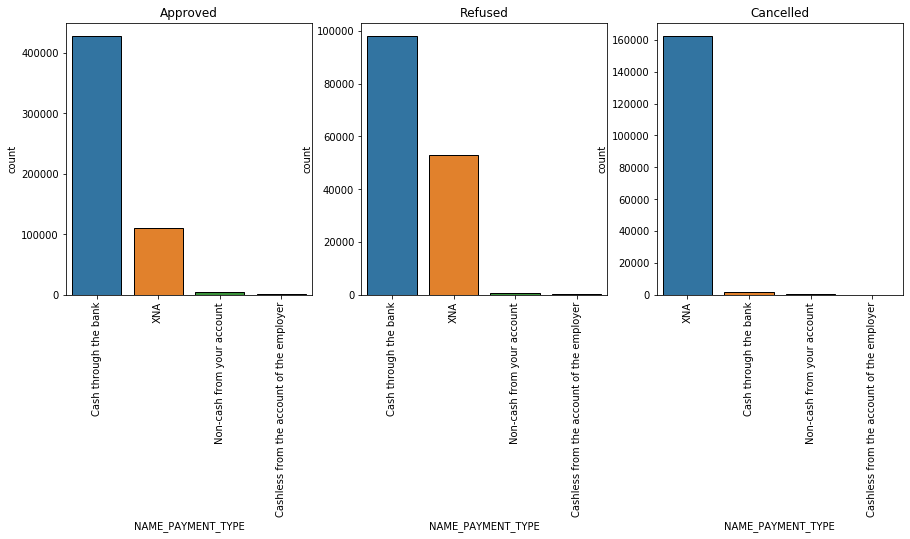

In [78]:
# Plotting of NAME_PAYMENT_TYPE against different loan status
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s1=sns.countplot(x = approved['NAME_PAYMENT_TYPE'], data = approved, edgecolor = 'black' )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Approved')

plt.subplot(1,3,2)
s2=sns.countplot(x = refused['NAME_PAYMENT_TYPE'], data = refused, edgecolor = 'black' )
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.title('Refused')

plt.subplot(1,3,3)
s3=sns.countplot(x = canceled['NAME_PAYMENT_TYPE'], data = canceled, edgecolor = 'black' )
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Cancelled')
plt.show()

1. We can see that Payment Types are independent of loans approved or rejected.

### Step 6: Bivariate analysis and finding correlation of float columns 

In [79]:
# All columns that can be applied for Approved loans category
# Find correlation for different continious variables
req_cols=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[req_cols]
approved_corr= approved_num.corr()
approved_corr

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000000,0.516377,-0.030345,-0.031300,-0.000443,-0.013504,-0.002185,0.448676,0.268870,0.002623,0.258433,-0.023867,0.448676
RATE_DOWN_PAYMENT,0.516377,1.000000,-0.143937,-0.146246,-0.009618,-0.039918,-0.008694,-0.089878,-0.104063,-0.288491,-0.217647,-0.202543,-0.089878
DAYS_TERMINATION,-0.030345,-0.143937,1.000000,0.928684,0.493423,0.325197,-0.395027,0.208133,0.067562,0.055090,0.213445,0.400499,0.147640
DAYS_LAST_DUE,-0.031300,-0.146246,0.928684,1.000000,0.422905,0.401803,-0.255932,0.210620,0.082247,0.089247,0.223973,0.448766,0.171816
DAYS_LAST_DUE_1ST_VERSION,-0.000443,-0.009618,0.493423,0.422905,1.000000,0.516586,-0.801845,0.016978,-0.068258,-0.380459,0.044694,0.088720,-0.084546
DAYS_FIRST_DUE,-0.013504,-0.039918,0.325197,0.401803,0.516586,1.000000,0.004940,-0.021361,-0.053711,-0.205339,0.002849,0.176059,-0.049934
DAYS_FIRST_DRAWING,-0.002185,-0.008694,-0.395027,-0.255932,-0.801845,0.004940,1.000000,-0.024992,0.051694,0.308809,-0.037787,-0.011413,0.073824
AMT_GOODS_PRICE,0.448676,-0.089878,0.208133,0.210620,0.016978,-0.021361,-0.024992,1.000000,0.830909,0.636545,0.993364,0.254646,1.000000
AMT_ANNUITY,0.268870,-0.104063,0.067562,0.082247,-0.068258,-0.053711,0.051694,0.830909,1.000000,0.343250,0.825471,0.253921,0.814345
CNT_PAYMENT,0.002623,-0.288491,0.055090,0.089247,-0.380459,-0.205339,0.308809,0.636545,0.343250,1.000000,0.626794,0.187973,0.646532


In [80]:
# Finding top 10 correlated variables for approved dataframe
approved_corr.unstack().sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION  AMT_APPLICATION     1.000000
AMT_CREDIT       AMT_GOODS_PRICE     0.993364
AMT_APPLICATION  AMT_CREDIT          0.961762
DAYS_LAST_DUE    DAYS_TERMINATION    0.928684
AMT_ANNUITY      AMT_GOODS_PRICE     0.830909
AMT_CREDIT       AMT_ANNUITY         0.825471
AMT_ANNUITY      AMT_APPLICATION     0.814345
CNT_PAYMENT      AMT_APPLICATION     0.646532
                 AMT_GOODS_PRICE     0.636545
AMT_CREDIT       CNT_PAYMENT         0.626794
dtype: float64

In [81]:
# Finding bottom 10 correlated variables for approved dataframe
approved_corr.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_TERMINATION           RATE_DOWN_PAYMENT           -0.143937
DAYS_LAST_DUE              RATE_DOWN_PAYMENT           -0.146246
RATE_DOWN_PAYMENT          DAYS_DECISION               -0.202543
CNT_PAYMENT                DAYS_FIRST_DUE              -0.205339
RATE_DOWN_PAYMENT          AMT_CREDIT                  -0.217647
DAYS_FIRST_DRAWING         DAYS_LAST_DUE               -0.255932
CNT_PAYMENT                RATE_DOWN_PAYMENT           -0.288491
                           DAYS_LAST_DUE_1ST_VERSION   -0.380459
DAYS_FIRST_DRAWING         DAYS_TERMINATION            -0.395027
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING          -0.801845
dtype: float64

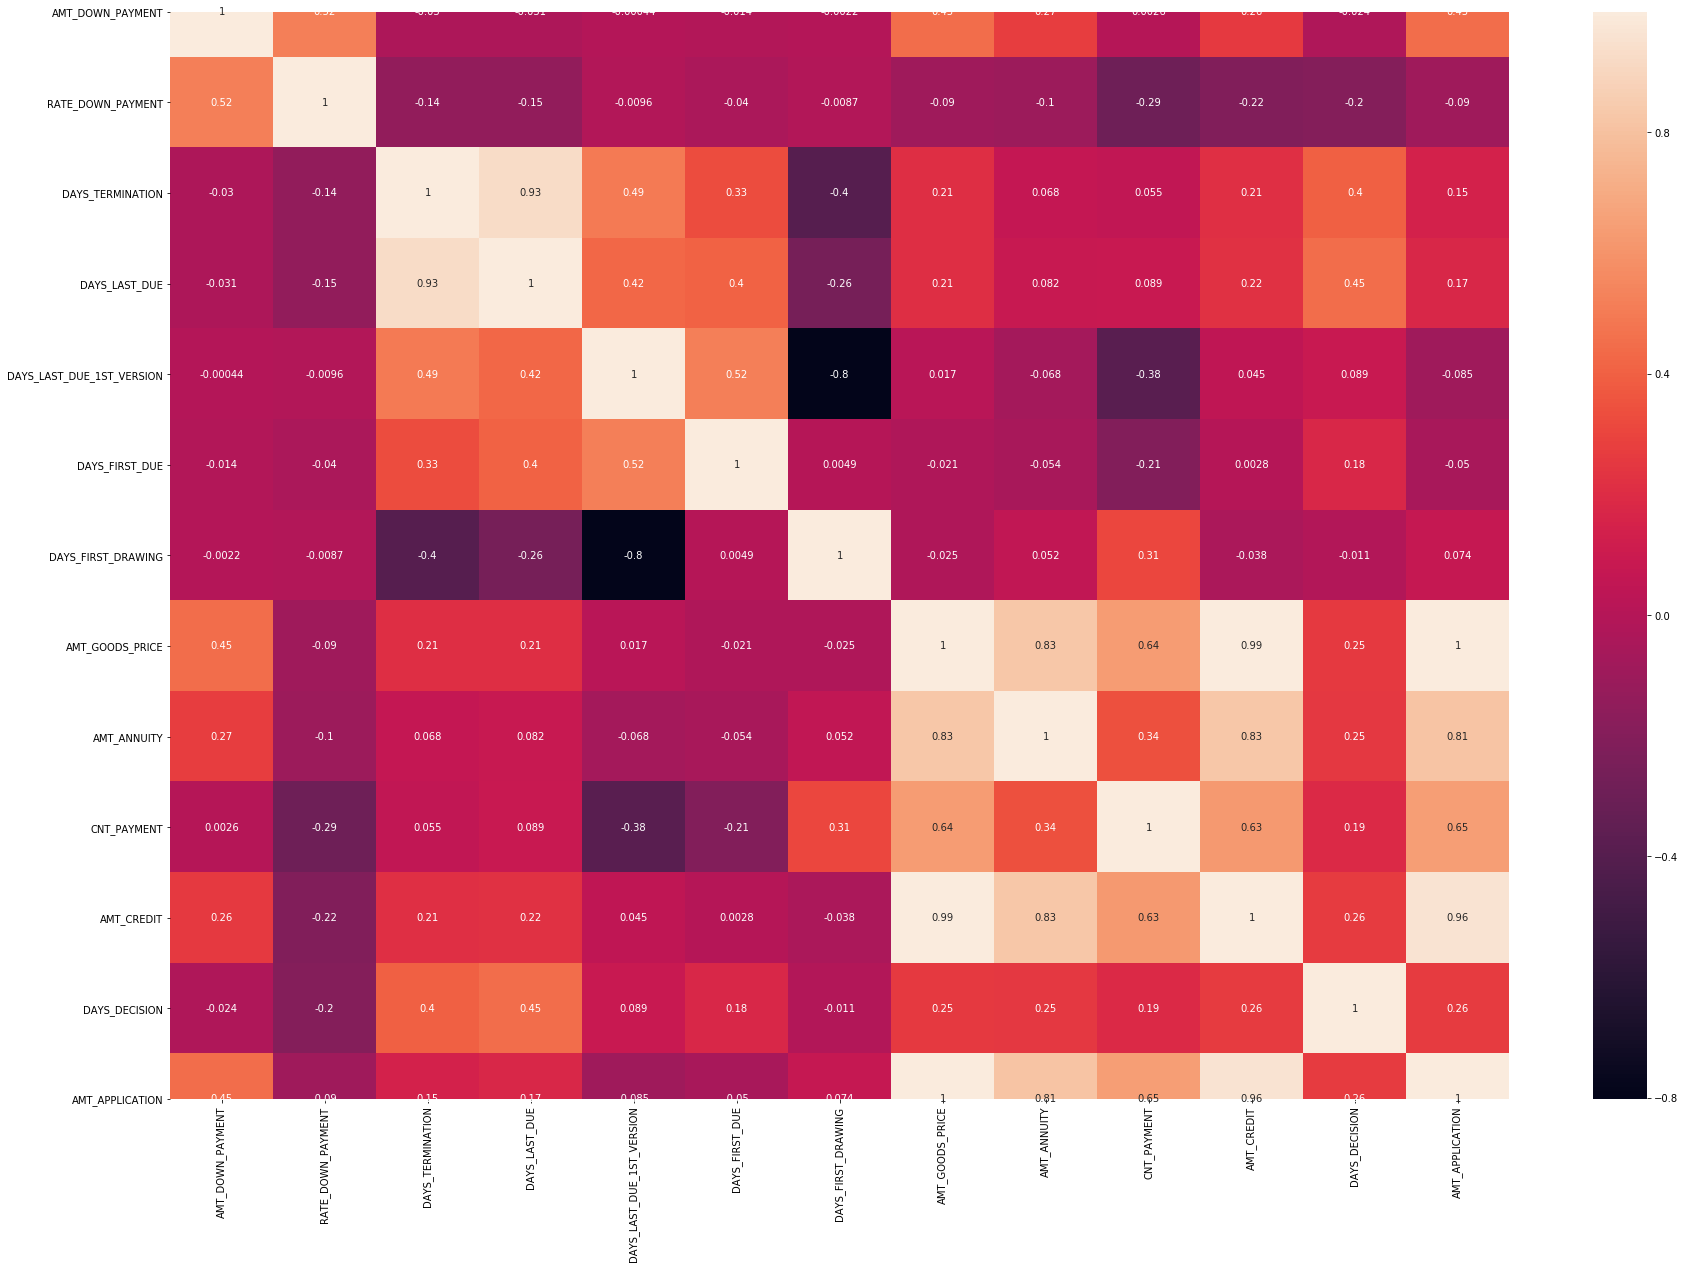

In [82]:
# Plotting HeatMap for continous variables for approved loan
plt.figure(figsize=(30,20))
sns.heatmap(approved_corr,annot=True)
plt.show()

In [83]:
# All relevent columns for refused loans
# Find correlation for different continious variables
refused_cols =['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[refused_cols]
refused_corr= refused_num.corr()
refused_corr

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000000,0.427552,0.521548,0.308369,0.100360,0.379584,0.004030,0.521548
RATE_DOWN_PAYMENT,0.427552,1.000000,-0.028518,-0.087846,-0.241751,-0.113887,-0.228560,-0.028518
AMT_GOODS_PRICE,0.521548,-0.028518,1.000000,0.819443,0.657709,0.991871,0.333317,0.999696
AMT_ANNUITY,0.308369,-0.087846,0.819443,1.000000,0.423864,0.816839,0.284388,0.814789
CNT_PAYMENT,0.100360,-0.241751,0.657709,0.423864,1.000000,0.676826,0.303465,0.669362
AMT_CREDIT,0.379584,-0.113887,0.991871,0.816839,0.676826,1.000000,0.269557,0.983723
DAYS_DECISION,0.004030,-0.228560,0.333317,0.284388,0.303465,0.269557,1.000000,0.264029
AMT_APPLICATION,0.521548,-0.028518,0.999696,0.814789,0.669362,0.983723,0.264029,1.000000


In [84]:
# Finding top 10 correlated variables for refused loans
refused_corr.unstack().sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION  AMT_APPLICATION    1.000000
AMT_GOODS_PRICE  AMT_APPLICATION    0.999696
                 AMT_CREDIT         0.991871
AMT_APPLICATION  AMT_CREDIT         0.983723
AMT_GOODS_PRICE  AMT_ANNUITY        0.819443
AMT_CREDIT       AMT_ANNUITY        0.816839
AMT_APPLICATION  AMT_ANNUITY        0.814789
AMT_CREDIT       CNT_PAYMENT        0.676826
AMT_APPLICATION  CNT_PAYMENT        0.669362
CNT_PAYMENT      AMT_GOODS_PRICE    0.657709
dtype: float64

In [85]:
# Finding bottom 10 correlated variables for refused loans
refused_corr.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION      AMT_ANNUITY          0.284388
                   AMT_CREDIT           0.269557
                   AMT_APPLICATION      0.264029
AMT_DOWN_PAYMENT   CNT_PAYMENT          0.100360
DAYS_DECISION      AMT_DOWN_PAYMENT     0.004030
AMT_APPLICATION    RATE_DOWN_PAYMENT   -0.028518
AMT_ANNUITY        RATE_DOWN_PAYMENT   -0.087846
RATE_DOWN_PAYMENT  AMT_CREDIT          -0.113887
                   DAYS_DECISION       -0.228560
                   CNT_PAYMENT         -0.241751
dtype: float64

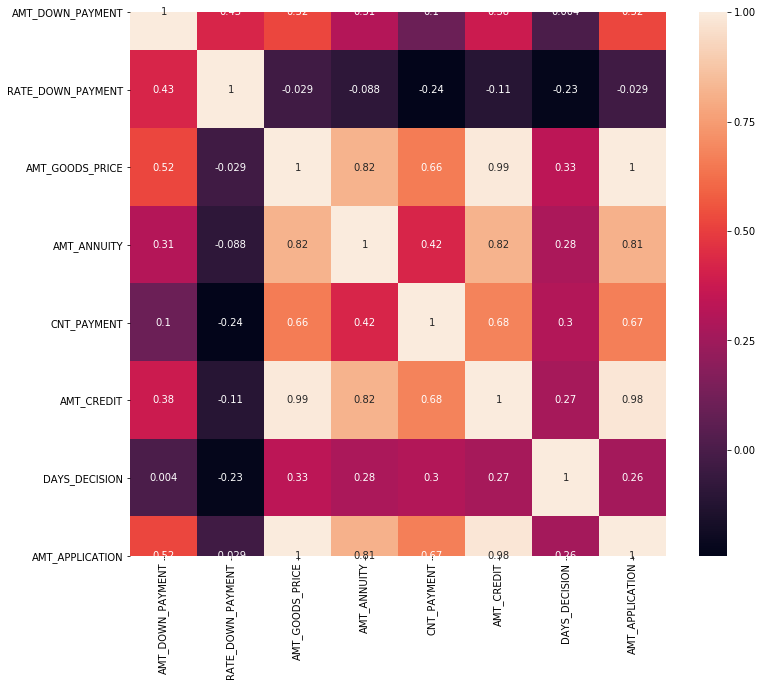

In [86]:
# Plotting HeatMap for continous variables for refused loan
plt.figure(figsize = (12,10))
sns.heatmap(refused_corr,annot=True)
plt.show()

C:\Users\Aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


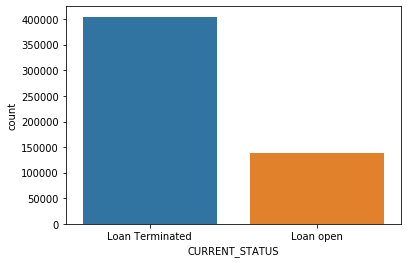

In [87]:
# Checking how many loans are active

approved['CURRENT_STATUS']=approved['DAYS_TERMINATION'].apply(lambda x: 'Loan Terminated' if x<0 else 'Loan open' )
sns.countplot(x=approved['CURRENT_STATUS'],data=approved)
plt.show()

C:\Users\Aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


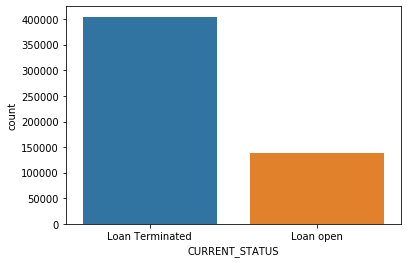

In [88]:
# Checking how many loans are active

approved['CURRENT_STATUS']=approved['DAYS_TERMINATION'].apply(lambda x: 'Loan Terminated' if x<0 else 'Loan open' )
sns.countplot(x=approved['CURRENT_STATUS'],data=approved)
plt.show()
    

Above plot shows how many previous loans are still active in the current applicants

### Step 7: Create one single aggregated data from previous data to be merged with application data

Previous data has all the history details for an application, it gives information about all the loans taken by applicants and there statuses. <br>
So, for each applicant there will be more than one record in previous data if he has an history of loans.<br>
In that case we can create aggregate data from previous data file to get aggregated details about different variables and compare with current application file

In [89]:
# Group refused loans to fetch number of refused loans and reason for refused for each applicant
refused_agg=refused.groupby(
   ['SK_ID_CURR'],as_index=False).agg(
    {
        'NAME_CONTRACT_STATUS':'count',
        'CODE_REJECT_REASON':pd.Series.mode
        
    }
).rename(columns={'NAME_CONTRACT_STATUS':'Refused Loans','CODE_REJECT_REASON':'REFUSED_REASON'})

In [90]:
# Group approved loans to fetch average of different continuos variables which might be useful for decision making
approved_agg = approved.groupby(
   ['SK_ID_CURR'],as_index=False).agg(
    {
        'AMT_ANNUITY':'mean',
        'AMT_CREDIT':'mean',
        'DAYS_TERMINATION':'mean'        
    }
).rename(columns={'AMT_ANNUITY':'PREV_AVG_AMT_ANNUITY','AMT_CREDIT':'PREV_AVG_AMT_CREDIT','DAYS_TERMINATION':'PREV_AVG_DAYS_TERMINATION'})
approved_agg.head()

,SK_ID_CURR,PREV_AVG_AMT_ANNUITY,PREV_AVG_AMT_CREDIT,PREV_AVG_DAYS_TERMINATION
0,100001,3951.0000,23787.00,-1612.0
1,100003,81462.3300,692259.75,-583.0
2,100004,5357.2500,20106.00,-714.0
3,100006,26636.7600,471465.00,182550.0
4,100007,14524.3125,279344.25,365243.0


In [91]:
# Fetch uniwue SK_ID_CURR from previous data
previous_identity_col=pd.DataFrame(previous_data['SK_ID_CURR'].drop_duplicates()).sort_values(by='SK_ID_CURR')

In [92]:
# Merge all the three dataframes previous_identity_col,approved_agg and refused_agg to have one singe aggregated dataframe
merge_previous = pd.merge(previous_identity_col,approved_agg,how='left', on='SK_ID_CURR')
merge_previous = pd.merge(merge_previous,refused_agg,how='left', on='SK_ID_CURR')
merge_previous['Refused Loans']=merge_previous['Refused Loans'].fillna(0)
merge_previous.sort_values(by='SK_ID_CURR').head()

,SK_ID_CURR,PREV_AVG_AMT_ANNUITY,PREV_AVG_AMT_CREDIT,PREV_AVG_DAYS_TERMINATION,Refused Loans,REFUSED_REASON
0,100001,3951.0000,23787.00,-1612.0,0.0,NaN
1,100003,81462.3300,692259.75,-583.0,0.0,NaN
2,100004,5357.2500,20106.00,-714.0,0.0,NaN
3,100006,26636.7600,471465.00,182550.0,0.0,NaN
4,100007,14524.3125,279344.25,365243.0,0.0,NaN


In [93]:
# Check the merged dataframe for refused loans data
merge_previous.loc[(merge_previous['Refused Loans']>0)].head()

,SK_ID_CURR,PREV_AVG_AMT_ANNUITY,PREV_AVG_AMT_CREDIT,PREV_AVG_DAYS_TERMINATION,Refused Loans,REFUSED_REASON
19,100027,21569.220,215865.0,-103.0,1.0,HC
21,100030,9035.685,49734.0,-223.0,6.0,"[LIMIT, SCO]"
23,100035,18107.946,227820.6,-972.8,3.0,HC
24,100036,6551.415,65007.0,-30.0,1.0,HC
25,100037,5305.995,45720.0,-1547.0,1.0,HC


### Step 8: Merge aggregated pervious data and application data to form one single dataframe

In [94]:
# Merge the application data and previous data and create one single dataframe
final_data=pd.merge(df,merge_previous,how='inner',on='SK_ID_CURR')
final_data.sort_values(by='SK_ID_CURR').head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_Category,Income_Category,Annuity_Category,Goods_Category,Age_Category,PREV_AVG_AMT_ANNUITY,PREV_AVG_AMT_CREDIT,PREV_AVG_DAYS_TERMINATION,Refused Loans,REFUSED_REASON
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,0.535276,0.0039,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High,High,Very High,Low,81462.33000,692259.750,-583.00,0.0,NaN
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.729567,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,Very Low,Very Low,Very Low,Low,5357.25000,20106.000,-714.00,0.0,NaN
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.650442,0.535276,0.0000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low,High,Low,Low,26636.76000,471465.000,182550.00,0.0,NaN
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,1.0,2,2,THURSDAY,11,Religion,0.322738,0.535276,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,Medium,High,Very Low,14524.31250,279344.250,365243.00,0.0,NaN
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,Laborers,2.0,2,2,WEDNESDAY,16,Other,0.354225,0.621226,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low,High,High,Low,15839.69625,203459.625,-872.75,0.0,NaN


Conclusion: 
From the above Analysis we can conclude that below variables should be considered for granting loan.
1) DAYS_BIRTH – This is the Age of the consumer and it is found that chances to be a defaulter are more for the consumers with lesser Age compare to Higher.
2) AMT_CREDIT – This is also very important factor, If Credit amount is higher then Risk from the defaulter is Highers
3) AMT_ANNUITY  - As Credit amount is increased, Annuity amount also increased. Refusal of loan is higher in case of Higher Amount of Annuity
4) DAYS_EMPLOYED – This factor shows if consumer has regular and stable income, more the days employed less the Risk for company.
5) Refused Loans – There are high risk of being defaulter if the previous applications of consumer  are refused.